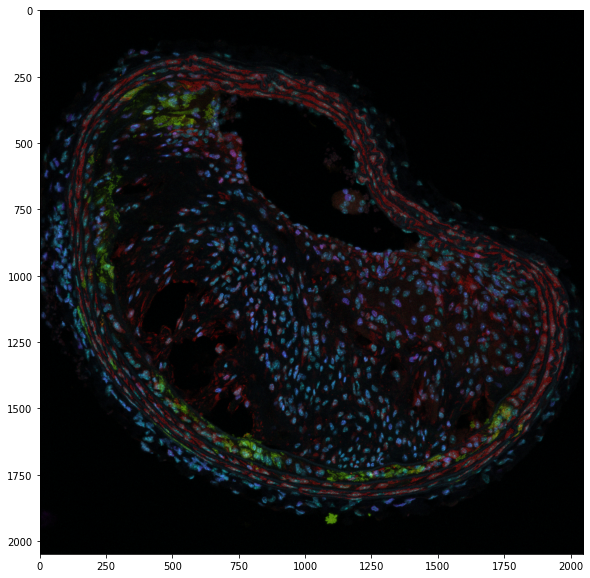

In [4]:
import numpy as np
import colorsys
import random
from PIL import Image
import os
from skimage import io
import matplotlib.pyplot as plt
def multichannel(marker, nuclei,marker2,marker3):

        channel1 = marker*2/65535
        channel2 = marker3*2/65535
        # channel2 = np.zeros((nuclei.shape[0], nuclei.shape[1]))
        channel3 = nuclei/65535
        channel4 = marker2*2/65535
        # channel4 = np.zeros((nuclei.shape[0], nuclei.shape[1]))

        img = np.concatenate(
            [channel1[np.newaxis, :], channel2[np.newaxis, :], channel3[np.newaxis, :], channel4[np.newaxis, :]])
        img = np.moveaxis(img, 0, 2)
        n_channels = img.shape[2]
        colors = np.array(generate_colors(n_channels))
        out_shape = list(img.shape)
        out_shape[2] = 3  ## change to RGB number of channels (3)
        out = np.zeros(out_shape)
        for chan in range(img.shape[2]):
            out = out + np.expand_dims(img[:, :, chan], axis=2) * np.expand_dims(colors[chan] / 255, axis=0)
        out = out / np.max(out)
        out = Image.fromarray((out * 255).astype(np.uint8))
        return out
def generate_colors(class_names):
    hsv_tuples = [(x / class_names, 1., 1.) for x in range(class_names)]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))
    random.seed(10101)  # Fixed seed for consistent colors across runs.
    random.shuffle(colors)  # Shuffle colors to decorrelate adjacent classes.
    random.seed(None)  # Reset seed to default.
    return colors



img= '/scratch/nm4wu/2022-01-30_Dual_EDU/TIFF_wsi/90985-19B.tif'
from skimage import io
TdTom=3
lineage=1
EdU=0
nuclei=2
# slice_=4
imgs = io.imread(img)
out = multichannel(imgs[:,TdTom,:,:].max(0), imgs[:,nuclei,:,:].max(0),imgs[:,lineage,:,:].max(0),imgs[:,EdU,:,:].max(0))
plt.figure(figsize=(10,10))
plt.imshow(out)

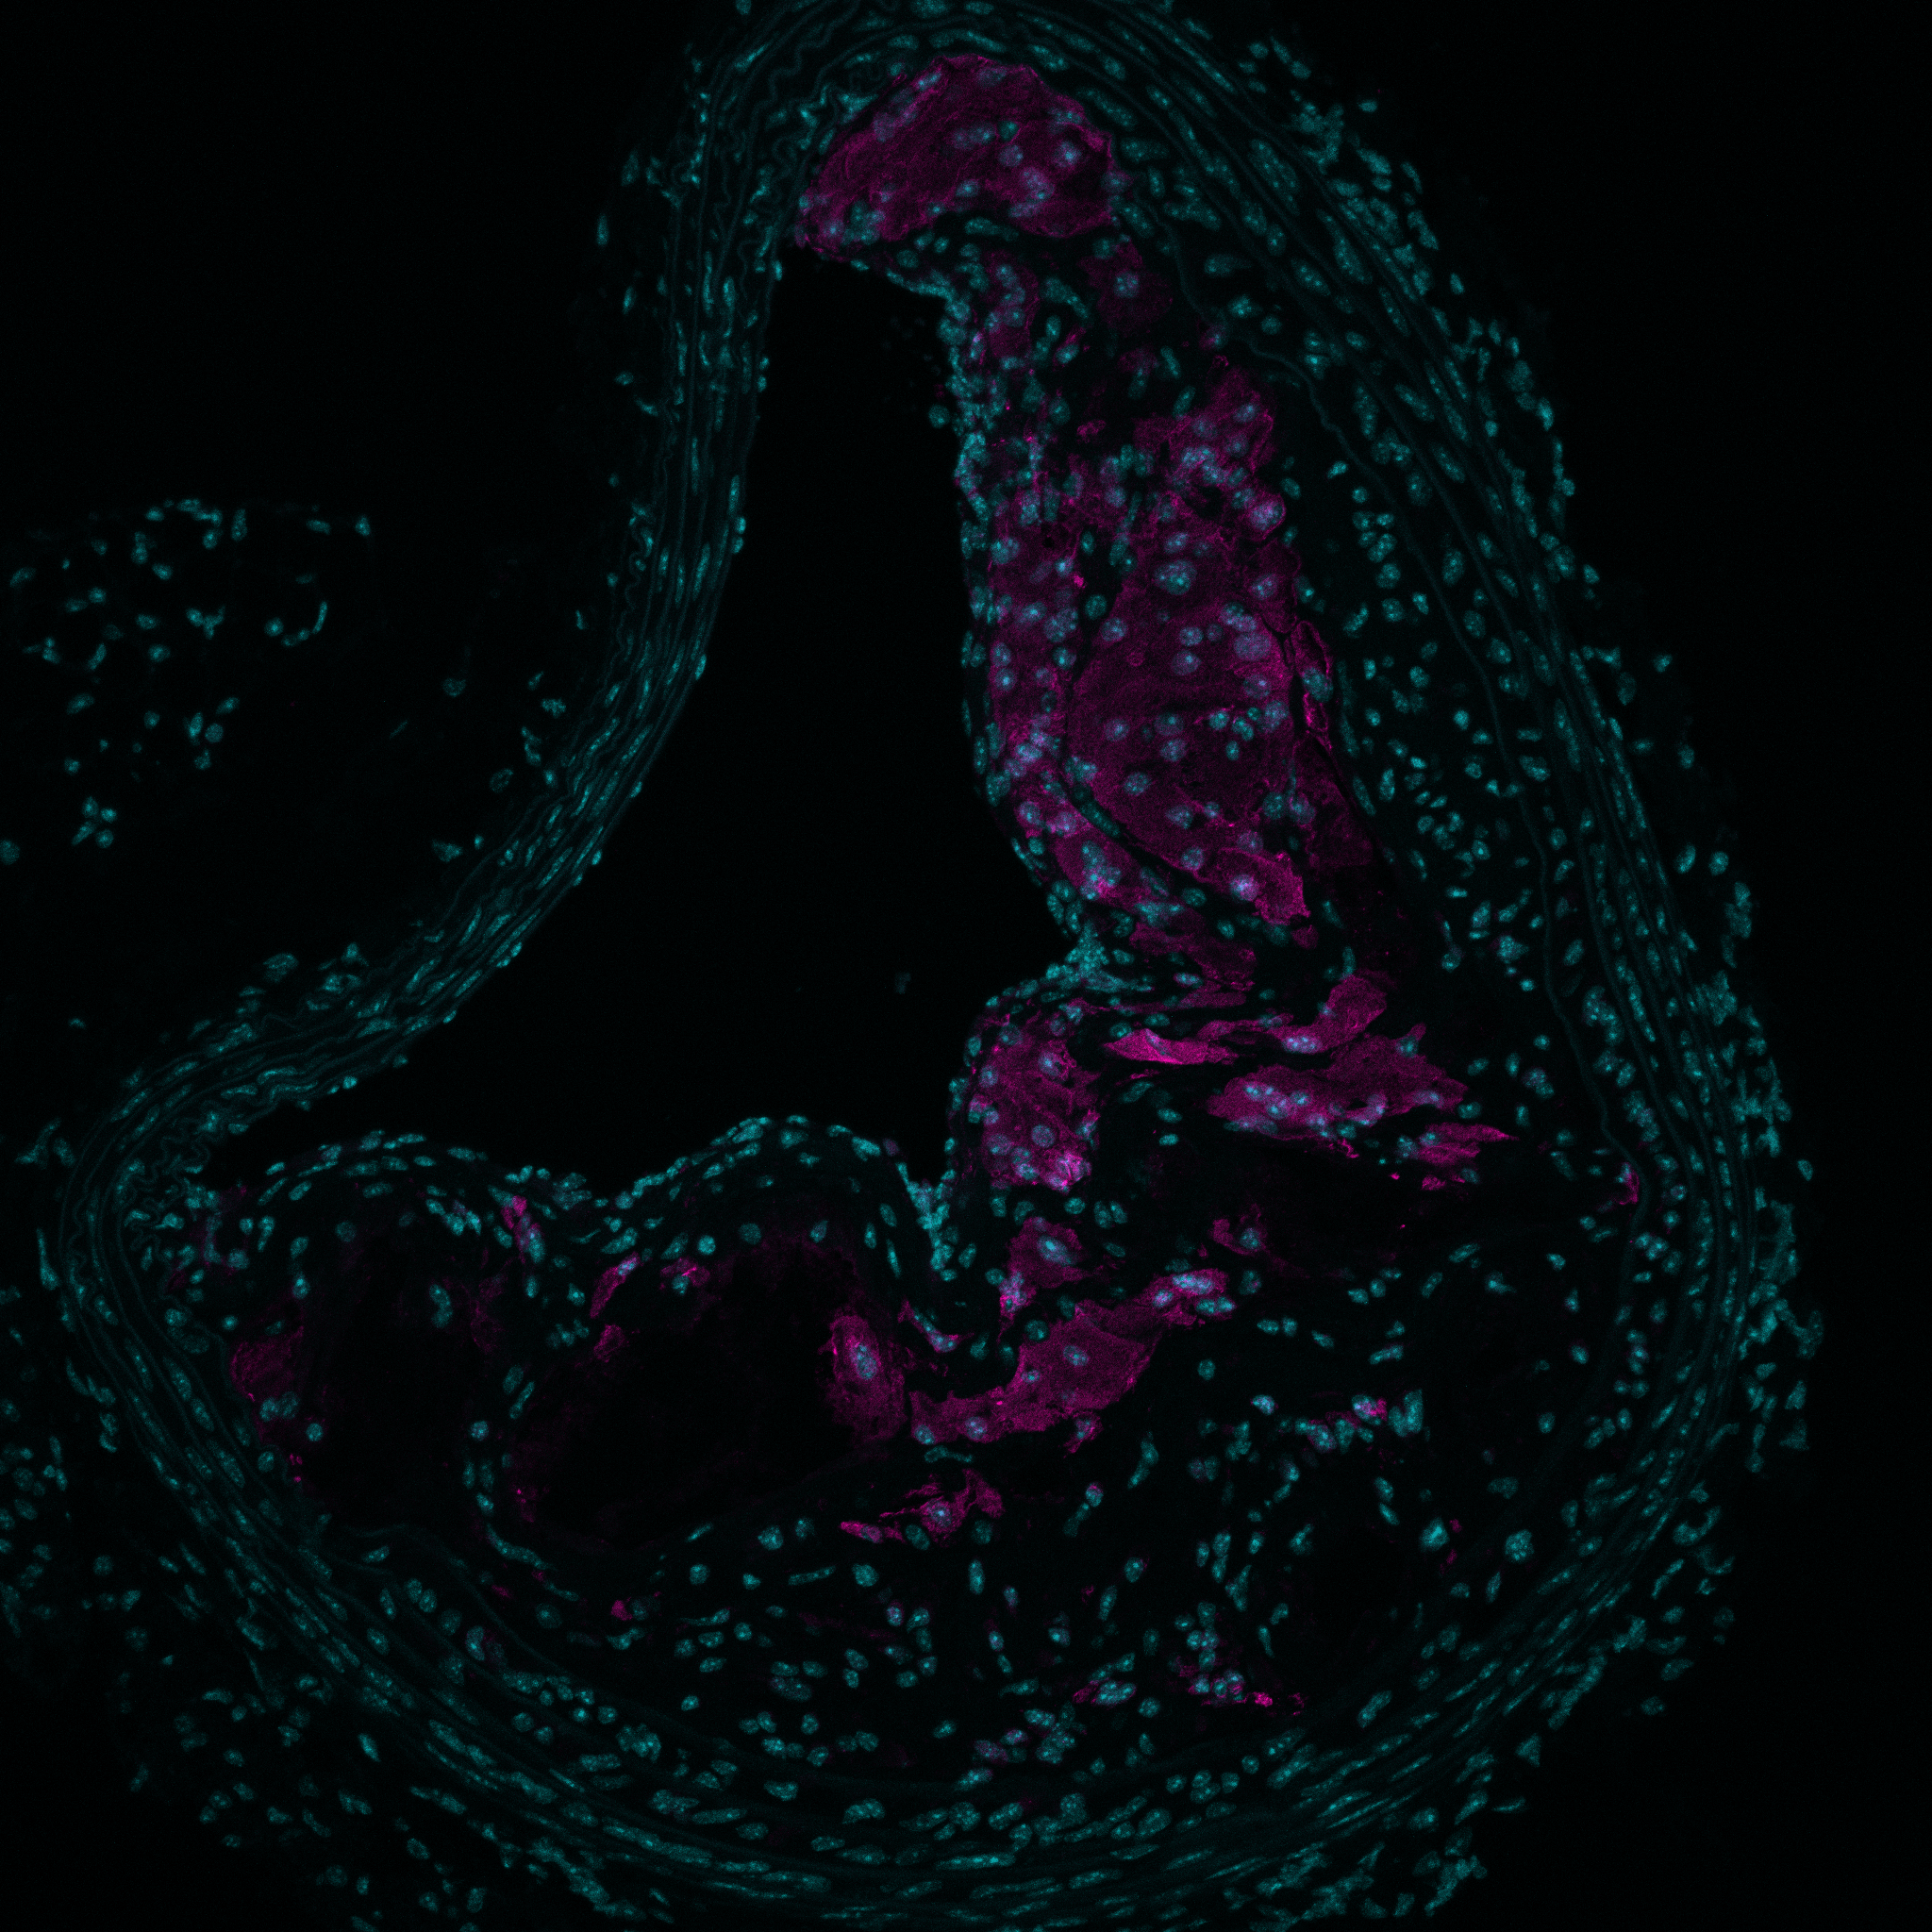

In [3]:
def multichannel(marker, nuclei):

        channel1 = marker
        channel2 = marker
        # channel2 = np.zeros((nuclei.shape[0], nuclei.shape[1]))
        channel3 = nuclei
        channel4 = np.zeros((nuclei.shape[0], nuclei.shape[1]))

        img = np.concatenate(
            [channel1[np.newaxis, :], channel2[np.newaxis, :], channel3[np.newaxis, :], channel4[np.newaxis, :]])
        img = np.moveaxis(img, 0, 2)
        n_channels = img.shape[2]
        colors = np.array(generate_colors(n_channels))
        out_shape = list(img.shape)
        out_shape[2] = 3  ## change to RGB number of channels (3)
        out = np.zeros(out_shape)
        for chan in range(img.shape[2]):
            out = out + np.expand_dims(img[:, :, chan], axis=2) * np.expand_dims(colors[chan] / 255, axis=0)
        out = out / np.max(out)
        out = Image.fromarray((out * 255).astype(np.uint8))
        return out
def generate_colors(class_names):
    hsv_tuples = [(x / class_names, 1., 1.) for x in range(class_names)]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))
    random.seed(10101)  # Fixed seed for consistent colors across runs.
    random.shuffle(colors)  # Shuffle colors to decorrelate adjacent classes.
    random.seed(None)  # Reset seed to default.
    return colors

img = '/scratch/nm4wu/data_immuno/Image_classification/OL_LGALS3/TIFF_wsi/86629_17.tif'
from skimage import io
marker=3
nuclei=2
slice_=7
imgs = io.imread(img)
out = multichannel(imgs[:,marker,:,:].max(0), imgs[:,nuclei,:,:].max(0))
out

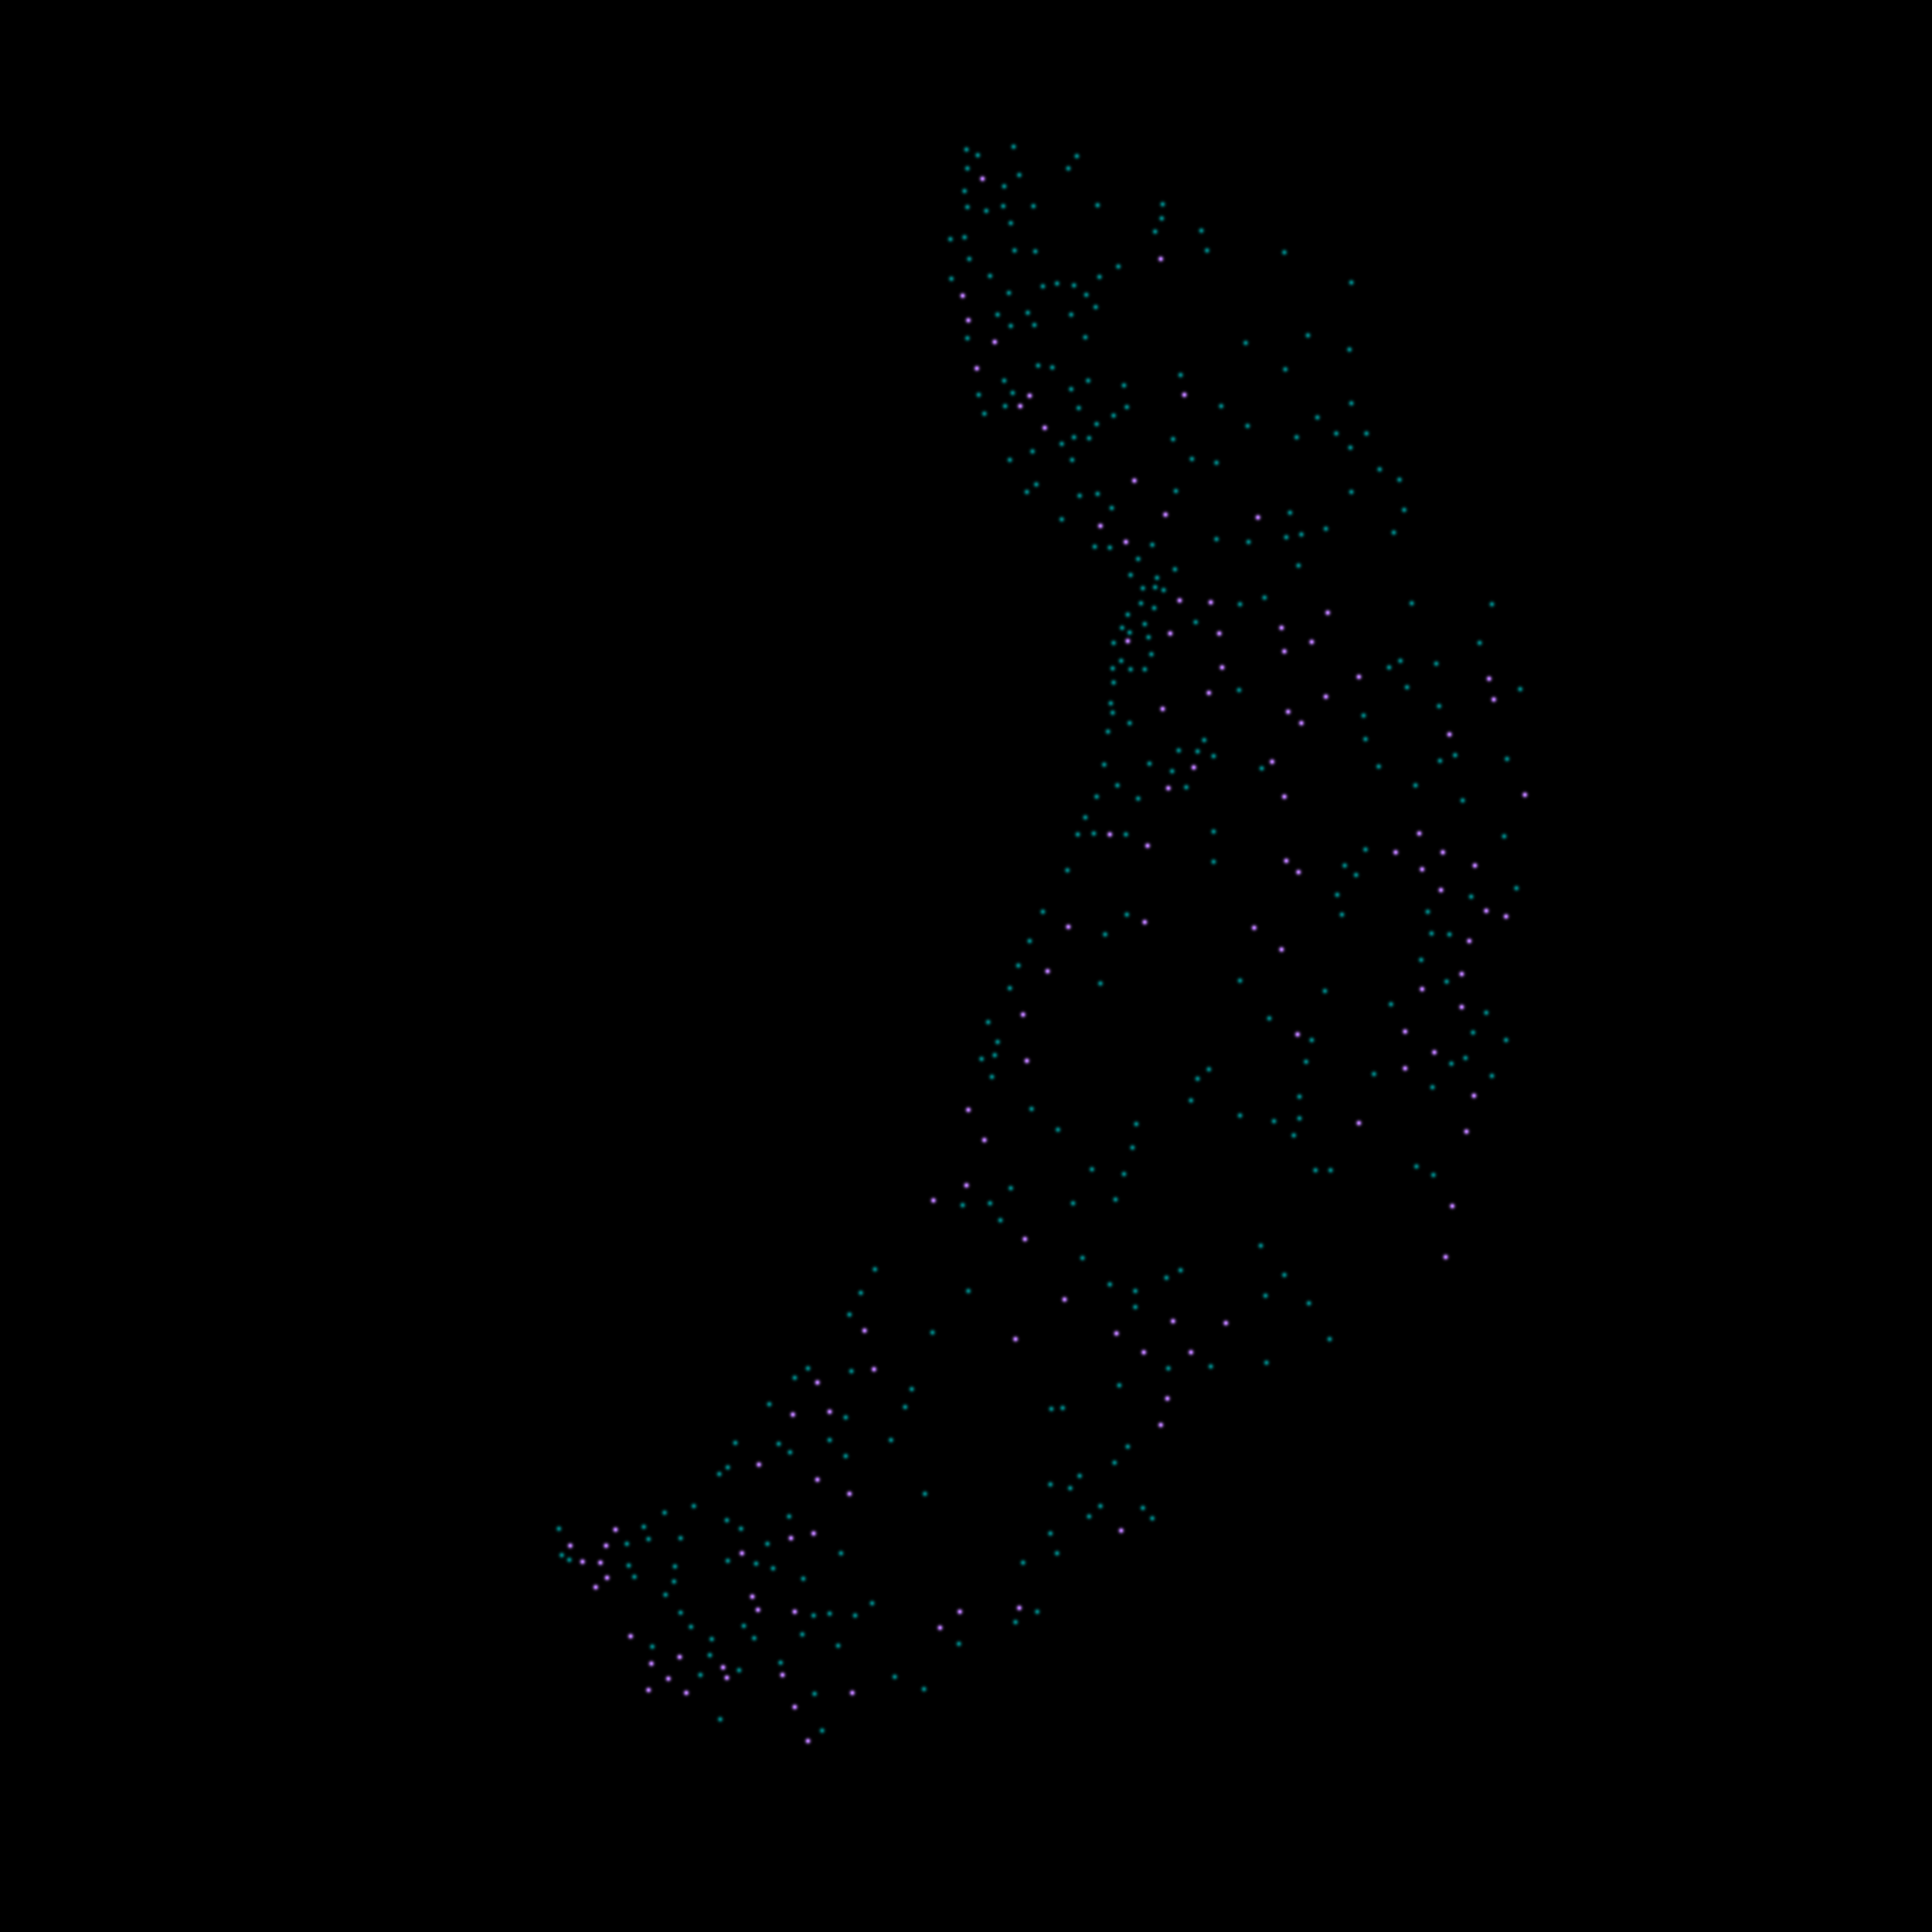

In [4]:
def multichannel(marker, nuclei):

        channel1 = marker
        channel2 = marker
        # channel2 = np.zeros((nuclei.shape[0], nuclei.shape[1]))
        channel3 = nuclei
        channel4 = np.zeros((nuclei.shape[0], nuclei.shape[1]))

        img = np.concatenate(
            [channel1[np.newaxis, :], channel2[np.newaxis, :], channel3[np.newaxis, :], channel4[np.newaxis, :]])
        img = np.moveaxis(img, 0, 2)
        n_channels = img.shape[2]
        colors = np.array(generate_colors(n_channels))
        out_shape = list(img.shape)
        out_shape[2] = 3  ## change to RGB number of channels (3)
        out = np.zeros(out_shape)
        for chan in range(img.shape[2]):
            out = out + np.expand_dims(img[:, :, chan], axis=2) * np.expand_dims(colors[chan] / 255, axis=0)
        out = out / np.max(out)
        out = Image.fromarray((out * 255).astype(np.uint8))
        return out
import numpy as np
from scipy.ndimage import gaussian_filter 

dir_='/scratch/nm4wu/data_/Inference_LGSA_triained_over_lineage_uda/output_infer/gt_point_classes/94032-8.npy'
marker = np.load(dir_)[:,:,3]
marker = gaussian_filter(marker,sigma=2) 
nuclei = np.load(dir_)[:,:,0]
nuclei = gaussian_filter(nuclei,sigma=2) 

out = multichannel(marker, nuclei)
out

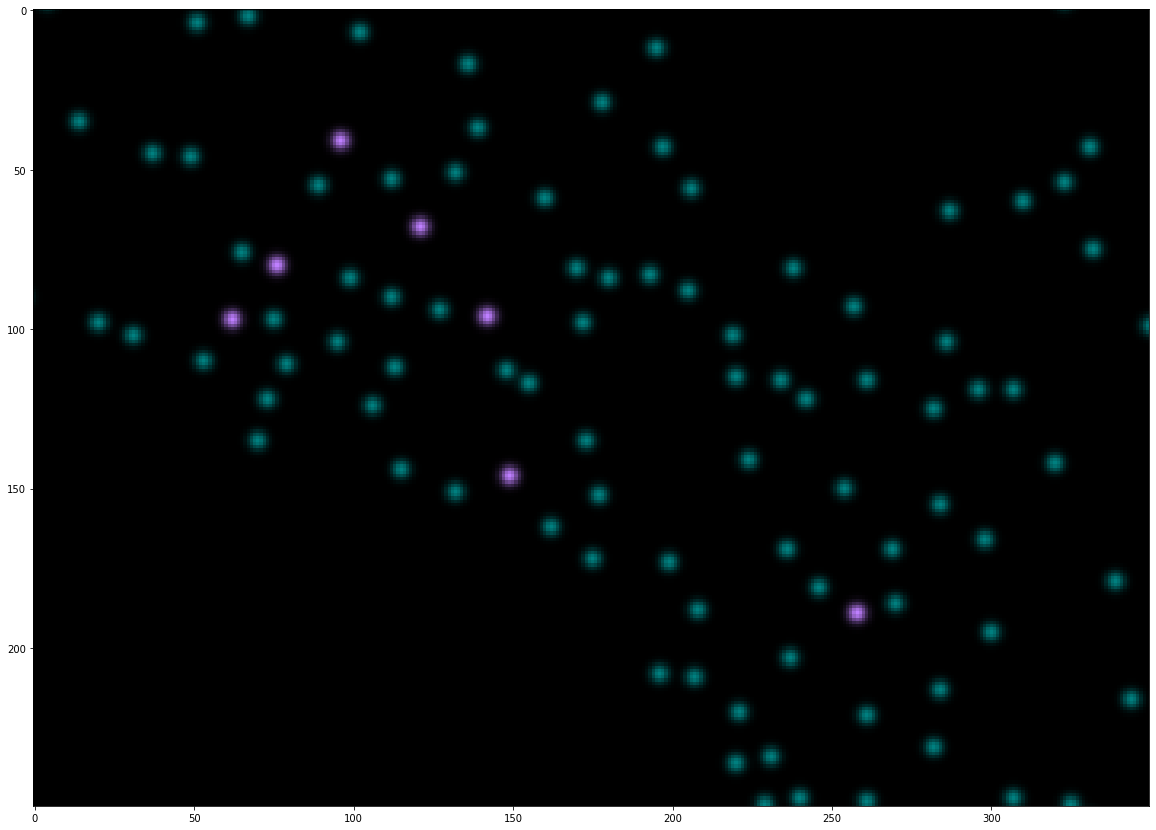

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(np.array(out)[350:600,850:1200])